<a href="https://colab.research.google.com/github/gabrielfernandorey/GGGR/blob/main/Arboles/SRT%20v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SRT v4 - Ensayo
### Arboles de regresion - Nuevo Dataset

In [1]:
import random
import string
import pandas as pd
import numpy as np
from datetime import date

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


### Importamos Datos

In [2]:
!wget https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/Regresion%20lineal/serie_acc_SRT.csv

--2023-05-05 18:14:22--  https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/Regresion%20lineal/serie_acc_SRT.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26984867 (26M) [text/plain]
Saving to: ‘serie_acc_SRT.csv.1’

serie_acc_SRT.csv.1 100%[===================>]  25.73M   149MB/s    in 0.2s    

2023-05-05 18:14:22 (149 MB/s) - ‘serie_acc_SRT.csv.1’ saved [26984867/26984867]



In [3]:
df = pd.read_csv('/content/serie_acc_SRT.csv', header=0, sep=';',
                 names=['año','mes','codigo','total_cp'],
                 dtype={'año': str, 'mes': str, 'codigo': str, 'total_cp': str})

In [4]:
column_order = ['codigo', 'año', 'mes', 'total_cp']
new_df = df.reindex(columns=column_order)
df = new_df.copy()

In [5]:
df

,codigo,año,mes,total_cp
0,01657000,1995,1,1
1,08300000,1995,7,1
2,01900000,1995,9,1
3,01900000,1995,11,1
4,01650000,1996,3,1
...,...,...,...,...
1470273,05582000,2023,5,1
1470274,01754000,2023,5,7
1470275,03503000,2023,5,3
1470276,X5000FJA,2023,5,1


In [6]:
df.head()

,codigo,año,mes,total_cp
0,01657000,1995,1,1
1,08300000,1995,7,1
2,01900000,1995,9,1
3,01900000,1995,11,1
4,01650000,1996,3,1


### EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470278 entries, 0 to 1470277
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   codigo    1469958 non-null  object
 1   año       1470278 non-null  object
 2   mes       1470278 non-null  object
 3   total_cp  1470278 non-null  object
dtypes: object(4)
memory usage: 44.9+ MB


#### Ajustamos tipo de datos

In [8]:
df['año'] = pd.to_numeric(df['año'], downcast='integer') #corregimos el formato de la columna 

In [9]:
df['mes'] = pd.to_numeric(df['mes']) #corregimos el formato de la columna 

In [10]:
df['total_cp'] = pd.to_numeric(df['total_cp']) #corregimos el formato de la columna 

In [11]:
df.dtypes

codigo      object
año          int16
mes          int64
total_cp     int64
dtype: object

In [12]:
df.head()

,codigo,año,mes,total_cp
0,01657000,1995,1,1
1,08300000,1995,7,1
2,01900000,1995,9,1
3,01900000,1995,11,1
4,01650000,1996,3,1


In [13]:
df = df.sort_values(['año','mes'], ascending=True)
df

,codigo,año,mes,total_cp
0,01657000,1995,1,1
1,08300000,1995,7,1
2,01900000,1995,9,1
3,01900000,1995,11,1
4,01650000,1996,3,1
...,...,...,...,...
1470273,05582000,2023,5,1
1470274,01754000,2023,5,7
1470275,03503000,2023,5,3
1470276,X5000FJA,2023,5,1


#### Verificar cuantos registros tienen el codpos menor a 8 caracteres

In [14]:
df_codigo = df.loc[df['codigo'].apply(lambda x: len(str(x)) < 8)]

In [15]:
df_codigo

,codigo,año,mes,total_cp
20,NaN,1996,7,26035
75,NaN,1996,8,29377
88,NaN,1996,9,29610
102,NaN,1996,10,34248
120,NaN,1996,11,35567
...,...,...,...,...
1423676,NaN,2022,10,4
1430197,NaN,2022,11,1
1444874,NaN,2023,1,1
1452536,NaN,2023,2,2


In [16]:
new_df = df.dropna(subset=['codigo'])

In [17]:
new_df

,codigo,año,mes,total_cp
0,01657000,1995,1,1
1,08300000,1995,7,1
2,01900000,1995,9,1
3,01900000,1995,11,1
4,01650000,1996,3,1
...,...,...,...,...
1470273,05582000,2023,5,1
1470274,01754000,2023,5,7
1470275,03503000,2023,5,3
1470276,X5000FJA,2023,5,1


#### Verificamos cantidad de registros por codigo

In [18]:
codigos = df.value_counts('codigo')

In [19]:
mayores_a_15 = codigos[codigos > 15]

In [20]:
len(mayores_a_15)

18712

In [21]:
df = df[df['codigo'].isin(mayores_a_15.index)]

In [22]:
df

,codigo,año,mes,total_cp
0,01657000,1995,1,1
1,08300000,1995,7,1
2,01900000,1995,9,1
3,01900000,1995,11,1
4,01650000,1996,3,1
...,...,...,...,...
1470273,05582000,2023,5,1
1470274,01754000,2023,5,7
1470275,03503000,2023,5,3
1470276,X5000FJA,2023,5,1


### Transformacion

#### LabelEncoder

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
# Crear una instancia de OneHotEncoder
encoder = LabelEncoder()

In [25]:
# Codificar los valores alfanuméricos
X_encoded = encoder.fit_transform(df.codigo.values.reshape(-1,))

In [26]:
X_encoded.shape

(938484,)

In [27]:
pd.DataFrame(X_encoded)

,0
0,425
1,2081
2,553
3,553
4,421
...,...
938479,1570
938480,468
938481,1074
938482,17021


#### Embeddings

In [28]:
tamano_embedding = 50

In [29]:
matriz_embedding = np.random.rand(len(encoder.classes_), tamano_embedding)

In [30]:
matriz_embedding

array([[0.34541595, 0.84462921, 0.99763412, ..., 0.4805204 , 0.70841331,
        0.15531584],
       [0.03919935, 0.54935296, 0.19100734, ..., 0.60311159, 0.42051142,
        0.48936375],
       [0.80979075, 0.51357287, 0.19958643, ..., 0.98932932, 0.62697928,
        0.90695267],
       ...,
       [0.11968083, 0.88833054, 0.47567116, ..., 0.74767621, 0.71849265,
        0.38825377],
       [0.22399738, 0.58401768, 0.51301195, ..., 0.59346961, 0.2752166 ,
        0.40590258],
       [0.55826853, 0.41251345, 0.34589147, ..., 0.24864323, 0.69482268,
        0.35241034]])

In [31]:
encoder.classes_

array(['        ', '0   0000', '00000000', ..., 'Z9405DHC', 'Z9405DHZ',
       'Z9407DIE'], dtype=object)

In [32]:
# Vectores de embeddings asociados a un valor por cada atributo
atributos_embeddings = matriz_embedding[X_encoded]

In [33]:
atributos_embeddings.shape

(938484, 50)

#### Verificacion embeddings

In [34]:
i = 0
encoder.classes_[i]

'        '

In [35]:
matriz_embedding[i]

array([0.34541595, 0.84462921, 0.99763412, 0.5614833 , 0.49429492,
       0.44354953, 0.72514496, 0.06983188, 0.7887074 , 0.73227808,
       0.87270615, 0.12164581, 0.25474919, 0.96309642, 0.74322049,
       0.53025606, 0.88198699, 0.05919131, 0.64208301, 0.62185104,
       0.43429763, 0.00482628, 0.26976652, 0.82869655, 0.36831084,
       0.44141818, 0.98105312, 0.63310103, 0.56735979, 0.19838797,
       0.53321653, 0.41837815, 0.9815693 , 0.82750927, 0.56028562,
       0.62350383, 0.35229974, 0.18037567, 0.35018412, 0.64072374,
       0.14915579, 0.64902866, 0.88924871, 0.44701596, 0.45186407,
       0.44162771, 0.24591474, 0.4805204 , 0.70841331, 0.15531584])

In [36]:
matriz_embedding.shape

(18712, 50)

#### Dataframe con datos de embeddings

In [37]:
# Creamos un nuevo dataframe con los valores del embedding
embedding_df = pd.DataFrame(matriz_embedding, columns=[f'emb_{i}' for i in range(matriz_embedding.shape[1])])

In [38]:
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_40,emb_41,emb_42,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49
0,0.345416,0.844629,0.997634,0.561483,0.494295,0.443550,0.725145,0.069832,0.788707,0.732278,...,0.149156,0.649029,0.889249,0.447016,0.451864,0.441628,0.245915,0.480520,0.708413,0.155316
1,0.039199,0.549353,0.191007,0.573481,0.847547,0.118490,0.806175,0.768638,0.493720,0.899443,...,0.163486,0.192096,0.716527,0.230565,0.929572,0.309624,0.133081,0.603112,0.420511,0.489364
2,0.809791,0.513573,0.199586,0.150523,0.064407,0.589334,0.283721,0.832638,0.197758,0.922859,...,0.474881,0.986751,0.691872,0.193947,0.605601,0.544839,0.638502,0.989329,0.626979,0.906953
3,0.890281,0.916682,0.604327,0.964213,0.146733,0.736708,0.887331,0.346008,0.898447,0.724084,...,0.263422,0.199525,0.794397,0.635433,0.036392,0.103667,0.899066,0.666661,0.294695,0.337916
4,0.711370,0.022797,0.454665,0.295977,0.098140,0.787137,0.905761,0.259466,0.490817,0.764856,...,0.507045,0.596524,0.652897,0.808375,0.568454,0.994096,0.756136,0.488873,0.866151,0.479634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18707,0.463853,0.105639,0.996044,0.546349,0.804285,0.634824,0.888852,0.635814,0.200796,0.360824,...,0.054492,0.434791,0.761836,0.070544,0.938499,0.093850,0.052431,0.813512,0.321478,0.279212
18708,0.109695,0.152511,0.667771,0.452691,0.582018,0.941328,0.280866,0.643005,0.362238,0.797568,...,0.023866,0.545596,0.187487,0.883168,0.254709,0.952249,0.406739,0.826156,0.232209,0.504698
18709,0.119681,0.888331,0.475671,0.555807,0.983327,0.379458,0.003913,0.075627,0.933676,0.519665,...,0.437794,0.302016,0.911679,0.544254,0.026386,0.832509,0.141604,0.747676,0.718493,0.388254
18710,0.223997,0.584018,0.513012,0.507164,0.980756,0.461473,0.246500,0.195526,0.562160,0.937286,...,0.290999,0.048331,0.926122,0.132199,0.231228,0.490254,0.512318,0.593470,0.275217,0.405903


In [39]:
embedding_df['codigo'] = encoder.classes_

In [40]:
# Utilizamos el codigo como indice (para joinear)
embedding_df = embedding_df.set_index('codigo')
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_40,emb_41,emb_42,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49
codigo,,,,,,,,,,,,,,,,,,,,,
,0.345416,0.844629,0.997634,0.561483,0.494295,0.443550,0.725145,0.069832,0.788707,0.732278,...,0.149156,0.649029,0.889249,0.447016,0.451864,0.441628,0.245915,0.480520,0.708413,0.155316
0 0000,0.039199,0.549353,0.191007,0.573481,0.847547,0.118490,0.806175,0.768638,0.493720,0.899443,...,0.163486,0.192096,0.716527,0.230565,0.929572,0.309624,0.133081,0.603112,0.420511,0.489364
00000000,0.809791,0.513573,0.199586,0.150523,0.064407,0.589334,0.283721,0.832638,0.197758,0.922859,...,0.474881,0.986751,0.691872,0.193947,0.605601,0.544839,0.638502,0.989329,0.626979,0.906953
00001000,0.890281,0.916682,0.604327,0.964213,0.146733,0.736708,0.887331,0.346008,0.898447,0.724084,...,0.263422,0.199525,0.794397,0.635433,0.036392,0.103667,0.899066,0.666661,0.294695,0.337916
00005000,0.711370,0.022797,0.454665,0.295977,0.098140,0.787137,0.905761,0.259466,0.490817,0.764856,...,0.507045,0.596524,0.652897,0.808375,0.568454,0.994096,0.756136,0.488873,0.866151,0.479634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z9403DKJ,0.463853,0.105639,0.996044,0.546349,0.804285,0.634824,0.888852,0.635814,0.200796,0.360824,...,0.054492,0.434791,0.761836,0.070544,0.938499,0.093850,0.052431,0.813512,0.321478,0.279212
Z9405AFO,0.109695,0.152511,0.667771,0.452691,0.582018,0.941328,0.280866,0.643005,0.362238,0.797568,...,0.023866,0.545596,0.187487,0.883168,0.254709,0.952249,0.406739,0.826156,0.232209,0.504698
Z9405DHC,0.119681,0.888331,0.475671,0.555807,0.983327,0.379458,0.003913,0.075627,0.933676,0.519665,...,0.437794,0.302016,0.911679,0.544254,0.026386,0.832509,0.141604,0.747676,0.718493,0.388254


In [41]:
# Utilizamos el codigo como indice (para joinear)
df = df.set_index('codigo')
df

,año,mes,total_cp
codigo,,,
01657000,1995,1,1
08300000,1995,7,1
01900000,1995,9,1
01900000,1995,11,1
01650000,1996,3,1
...,...,...,...
05582000,2023,5,1
01754000,2023,5,7
03503000,2023,5,3


In [42]:
df.total_cp.max()

5313

#### Transformar la variable de salida

In [43]:
mmscaler = MinMaxScaler()

In [44]:
df['total_cp'] = mmscaler.fit_transform(df['total_cp'].values.reshape(-1,1))

In [45]:
df.head()

,año,mes,total_cp
codigo,,,
01657000,1995,1,0.0
08300000,1995,7,0.0
01900000,1995,9,0.0
01900000,1995,11,0.0
01650000,1996,3,0.0


#### Joins de Dataframes

In [46]:
df_join = embedding_df.join(df, lsuffix='_izq', rsuffix='_der')
df_join

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,año,mes,total_cp
codigo,,,,,,,,,,,,,,,,,,,,,
,0.345416,0.844629,0.997634,0.561483,0.494295,0.443550,0.725145,0.069832,0.788707,0.732278,...,0.447016,0.451864,0.441628,0.245915,0.480520,0.708413,0.155316,2001,11,0.000000
,0.345416,0.844629,0.997634,0.561483,0.494295,0.443550,0.725145,0.069832,0.788707,0.732278,...,0.447016,0.451864,0.441628,0.245915,0.480520,0.708413,0.155316,2011,7,0.000000
,0.345416,0.844629,0.997634,0.561483,0.494295,0.443550,0.725145,0.069832,0.788707,0.732278,...,0.447016,0.451864,0.441628,0.245915,0.480520,0.708413,0.155316,2012,8,0.000000
,0.345416,0.844629,0.997634,0.561483,0.494295,0.443550,0.725145,0.069832,0.788707,0.732278,...,0.447016,0.451864,0.441628,0.245915,0.480520,0.708413,0.155316,2013,2,0.000000
,0.345416,0.844629,0.997634,0.561483,0.494295,0.443550,0.725145,0.069832,0.788707,0.732278,...,0.447016,0.451864,0.441628,0.245915,0.480520,0.708413,0.155316,2013,9,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z9407DIE,0.558269,0.412513,0.345891,0.547964,0.974370,0.162645,0.897962,0.430206,0.964279,0.881380,...,0.485784,0.695338,0.215636,0.394672,0.248643,0.694823,0.352410,2016,2,0.000188
Z9407DIE,0.558269,0.412513,0.345891,0.547964,0.974370,0.162645,0.897962,0.430206,0.964279,0.881380,...,0.485784,0.695338,0.215636,0.394672,0.248643,0.694823,0.352410,2016,3,0.000000
Z9407DIE,0.558269,0.412513,0.345891,0.547964,0.974370,0.162645,0.897962,0.430206,0.964279,0.881380,...,0.485784,0.695338,0.215636,0.394672,0.248643,0.694823,0.352410,2016,5,0.000188


#### Datos de entrenamiento

In [47]:
df_final = df_join.reset_index()
df_final

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,año,mes,total_cp
0,,0.345416,0.844629,0.997634,0.561483,0.494295,0.443550,0.725145,0.069832,0.788707,...,0.447016,0.451864,0.441628,0.245915,0.480520,0.708413,0.155316,2001,11,0.000000
1,,0.345416,0.844629,0.997634,0.561483,0.494295,0.443550,0.725145,0.069832,0.788707,...,0.447016,0.451864,0.441628,0.245915,0.480520,0.708413,0.155316,2011,7,0.000000
2,,0.345416,0.844629,0.997634,0.561483,0.494295,0.443550,0.725145,0.069832,0.788707,...,0.447016,0.451864,0.441628,0.245915,0.480520,0.708413,0.155316,2012,8,0.000000
3,,0.345416,0.844629,0.997634,0.561483,0.494295,0.443550,0.725145,0.069832,0.788707,...,0.447016,0.451864,0.441628,0.245915,0.480520,0.708413,0.155316,2013,2,0.000000
4,,0.345416,0.844629,0.997634,0.561483,0.494295,0.443550,0.725145,0.069832,0.788707,...,0.447016,0.451864,0.441628,0.245915,0.480520,0.708413,0.155316,2013,9,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938479,Z9407DIE,0.558269,0.412513,0.345891,0.547964,0.974370,0.162645,0.897962,0.430206,0.964279,...,0.485784,0.695338,0.215636,0.394672,0.248643,0.694823,0.352410,2016,2,0.000188
938480,Z9407DIE,0.558269,0.412513,0.345891,0.547964,0.974370,0.162645,0.897962,0.430206,0.964279,...,0.485784,0.695338,0.215636,0.394672,0.248643,0.694823,0.352410,2016,3,0.000000
938481,Z9407DIE,0.558269,0.412513,0.345891,0.547964,0.974370,0.162645,0.897962,0.430206,0.964279,...,0.485784,0.695338,0.215636,0.394672,0.248643,0.694823,0.352410,2016,5,0.000188
938482,Z9407DIE,0.558269,0.412513,0.345891,0.547964,0.974370,0.162645,0.897962,0.430206,0.964279,...,0.485784,0.695338,0.215636,0.394672,0.248643,0.694823,0.352410,2016,6,0.000000


In [48]:
X_data = df_final.drop(['codigo','total_cp'], axis=1).to_numpy()

In [49]:
X_data.shape

(938484, 52)

In [50]:
y_data = df_final['total_cp'].to_numpy()

In [51]:
y_data

array([0.        , 0.        , 0.        , ..., 0.00018825, 0.        ,
       0.        ])

In [52]:
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.30, random_state=43) 

### Modelo

In [53]:
regr_2 = DecisionTreeRegressor(max_depth=15, min_samples_split=3, min_samples_leaf=3)
regr_3 = RandomForestRegressor(max_depth=5, min_samples_split=3, min_samples_leaf=3)
regr_4 = ExtraTreesRegressor(max_depth=5, min_samples_split=3, min_samples_leaf=3)

### Entrenamiento

In [71]:
#regr_2.fit(X_train, y_train)
#regr_3.fit(X_train, y_train)
regr_4.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=3)

### Validacion

##### DecisionTreeRegressor(max_depth=15)

In [66]:
pred_2_train = regr_2.predict(X_train)
pred_2_test = regr_2.predict(X_test)

In [67]:
mse_2_train = mean_squared_error(y_train, pred_2_train)
mse_2_test  = mean_squared_error(y_test, pred_2_test)

In [68]:
mse_2_train, mse_2_test

(3.253600561505504e-05, 3.883198733033243e-05)

In [69]:
rmse_2_train = np.sqrt(mse_2_train)
rmse_2_test  = np.sqrt(mse_2_test)
print('RMSE:', round(rmse_2_train,4), round(rmse_2_test,4))

RMSE: 0.0057 0.0062


In [70]:
score_2 = r2_score(y_test, pred_2_test)
print(f'R2 score: {score_2:.5f}')

R2 score: 0.62594


##### RandomForestRegressor(max_depth=5)

In [61]:
pred_3_train = regr_3.predict(X_train)
pred_3_test = regr_3.predict(X_test)

In [62]:
mse_3_train = mean_squared_error(y_train, pred_3_train)
mse_3_test  = mean_squared_error(y_test, pred_3_test)

In [63]:
mse_3_train, mse_3_test

(5.098937978573001e-05, 5.586417244138327e-05)

In [64]:
rmse_3_train = np.sqrt(mse_3_train)
rmse_3_test  = np.sqrt(mse_3_test)
print('RMSE:', round(rmse_3_train,4), round(rmse_3_test,4))

RMSE: 0.0071 0.0075


In [65]:
score_3 = r2_score(y_test, pred_3_test)
print(f'R2 score: {score_3:.5f}')

R2 score: 0.46188


##### ExtraTreesRegressor(max_depth=5)

In [72]:
pred_4_train = regr_4.predict(X_train)
pred_4_test = regr_4.predict(X_test)

In [73]:
mse_4_train = mean_squared_error(y_train, pred_4_train)
mse_4_test  = mean_squared_error(y_test, pred_4_test)

In [74]:
mse_4_train, mse_4_test

(7.54548184779673e-05, 7.749845732041425e-05)

In [75]:
rmse_4_train = np.sqrt(mse_4_train)
rmse_4_test  = np.sqrt(mse_4_test)
print('RMSE:', round(rmse_4_train,4), round(rmse_4_test,4))

RMSE: 0.0087 0.0088


In [76]:
score_4 = r2_score(y_test, pred_4_test)
print(f'R2 score: {score_4:.5f}')

R2 score: 0.25348


### Prediccion

In [95]:
# Ingresar codigo
codigo_in = random.choice(encoder.classes_) 
new_codigo_in = encoder.transform([codigo_in])
new_codigo_embedding = matriz_embedding[new_codigo_in]


In [96]:
# Ingresar año y mes
anio_in = 2023
mes_in = 6

In [97]:
atributos_in = np.concatenate((new_codigo_embedding, anio_in, mes_in), axis=None)

In [98]:
atributos_in = atributos_in.reshape(1, 52)

In [99]:
pred = regr_2.predict(atributos_in)

In [100]:
pred = mmscaler.inverse_transform(pred.reshape(-1, 1))

In [101]:
print(f"Prediccion para el código {codigo_in} Año {anio_in} Mes {mes_in}: {np.round(pred[0][0],2)} incidentes")  

Prediccion para el código 02751000 Año 2023 Mes 6: 7.33 incidentes


### Verificacion grafica

In [102]:
filtro = df_final['codigo'] == codigo_in
df_filtrado = df_final[filtro]
df_filtrado

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,año,mes,total_cp
124591,02751000,0.518732,0.797348,0.258191,0.405844,0.68055,0.846615,0.450112,0.818344,0.92382,...,0.948718,0.067105,0.932186,0.044252,0.389811,0.239069,0.949247,2003,2,0.000000
124592,02751000,0.518732,0.797348,0.258191,0.405844,0.68055,0.846615,0.450112,0.818344,0.92382,...,0.948718,0.067105,0.932186,0.044252,0.389811,0.239069,0.949247,2003,9,0.000000
124593,02751000,0.518732,0.797348,0.258191,0.405844,0.68055,0.846615,0.450112,0.818344,0.92382,...,0.948718,0.067105,0.932186,0.044252,0.389811,0.239069,0.949247,2004,10,0.000000
124594,02751000,0.518732,0.797348,0.258191,0.405844,0.68055,0.846615,0.450112,0.818344,0.92382,...,0.948718,0.067105,0.932186,0.044252,0.389811,0.239069,0.949247,2006,1,0.000000
124595,02751000,0.518732,0.797348,0.258191,0.405844,0.68055,0.846615,0.450112,0.818344,0.92382,...,0.948718,0.067105,0.932186,0.044252,0.389811,0.239069,0.949247,2008,8,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124701,02751000,0.518732,0.797348,0.258191,0.405844,0.68055,0.846615,0.450112,0.818344,0.92382,...,0.948718,0.067105,0.932186,0.044252,0.389811,0.239069,0.949247,2022,10,0.000377
124702,02751000,0.518732,0.797348,0.258191,0.405844,0.68055,0.846615,0.450112,0.818344,0.92382,...,0.948718,0.067105,0.932186,0.044252,0.389811,0.239069,0.949247,2022,11,0.000188
124703,02751000,0.518732,0.797348,0.258191,0.405844,0.68055,0.846615,0.450112,0.818344,0.92382,...,0.948718,0.067105,0.932186,0.044252,0.389811,0.239069,0.949247,2022,12,0.000377
124704,02751000,0.518732,0.797348,0.258191,0.405844,0.68055,0.846615,0.450112,0.818344,0.92382,...,0.948718,0.067105,0.932186,0.044252,0.389811,0.239069,0.949247,2023,1,0.000000


In [103]:
df_filtrado = df_filtrado.sort_values(['año','mes'], ascending=True)

In [104]:
fechas = []
totales = []

for row in df_filtrado.iterrows():
    fechas.append(str(row[1][51])+'-'+str(row[1][52])+'-01')
    totales.append(row[1][53])

In [105]:
fechas[0]

'2003-2-01'

In [106]:
totales = mmscaler.inverse_transform([totales])

In [107]:
df_graf = pd.DataFrame({'fechas':fechas, 'totales':totales.reshape(-1,)})

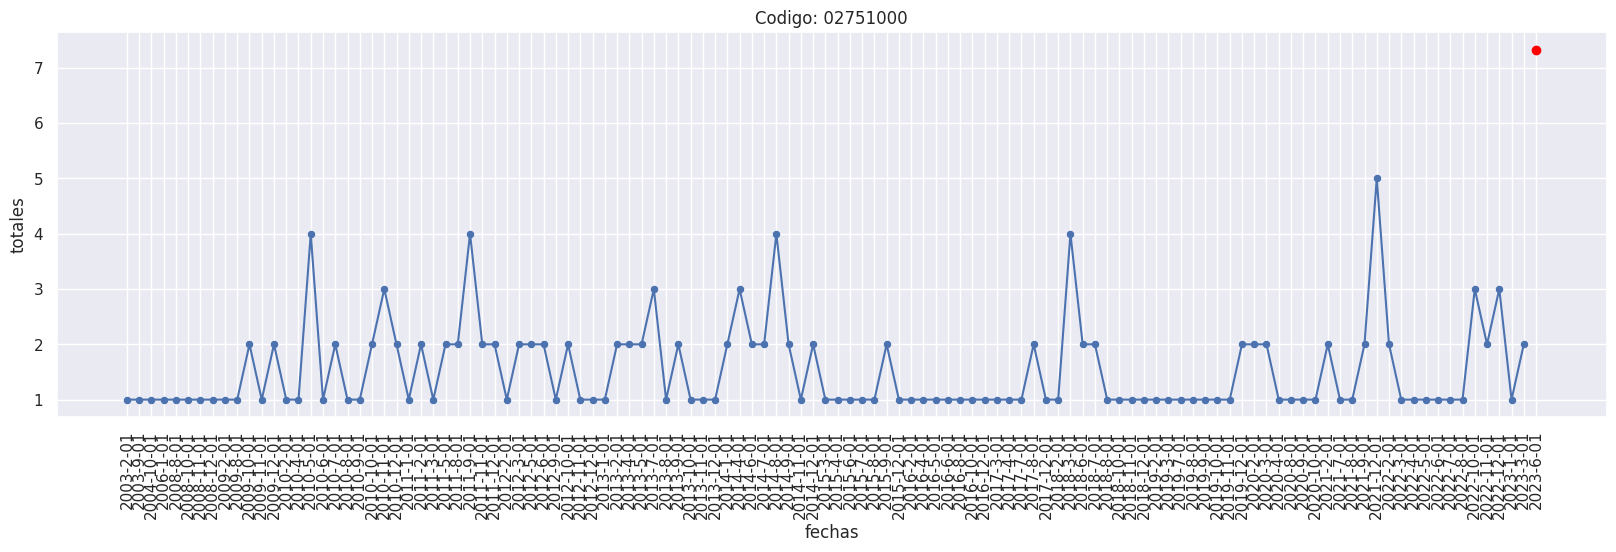

In [108]:
plt.figure(figsize=(20, 5))
sns.set(color_codes=True)
plt.xticks(rotation=90)
sns.scatterplot(x='fechas', y='totales', data=df_graf)
plt.scatter(x=(str(anio_in)+'-'+str(mes_in)+'-01'), y=pred, color='red')
plt.plot(df_graf.fechas, df_graf.totales)
plt.title("Codigo: "+codigo_in)
plt.show()